## CAB420 Final Assignment


# Importing Library and Read Data from CSV files


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Spliting data to trainning and testing set
from sklearn.model_selection import train_test_split
# Fitting Multiple Linear Regression to the trainning set
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

In [2]:
# Import dataset
rating_dataset = pd.read_csv("./data/ratings.csv")
movies_dataset = pd.read_csv("./data/movies.csv")

# Set the index by movieId, This line of code only able to execute once
movies_dataset.set_index('movieId', inplace = True)

# Convert genres to dummy variable dataset
movies_dataset = movies_dataset['genres'].str.get_dummies(sep='|')

# Cannot use year as parameter because in movie 3xxxx there is a movie does not have years
# movies_dataset["year"] = movies_dataset["title"].str.extract(r"\(([0-9]+)\)").astype(dtype=np.int)

# Filtering duplicate values in the MovieGenre list
# movies_dataset = movies_dataset.drop(columns=["(no genres listed)","Western","IMAX","Film-Noir","Children"], axis=1)
movies_dataset

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Combine Rating and Movie Dataset to one Dataset

In [3]:
full_rating_dataset = pd.merge(rating_dataset[["userId","movieId","rating"]], movies_dataset, on = 'movieId', how = "left")
full_rating_dataset

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5,1,70,3.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,1,101,5.0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
7,1,110,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,151,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,1,157,5.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression for Predicting a user how many marks will he/she giving to a movie according to he/she previous rating to other movie and the others how they rate this movie


In [4]:
X = full_rating_dataset.drop(columns=['rating'], axis=1).values
y = full_rating_dataset.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [5]:
y_pred.round()

array([3., 4., 3., ..., 4., 4., 4.])

In [6]:
y_test

array([5. , 2.5, 2.5, ..., 3.5, 4. , 5. ])

In [7]:
regressor.score(X_test,y_test)

0.04379180709657826

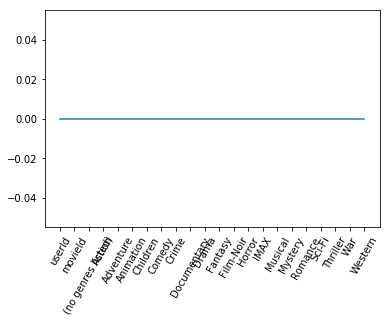

In [8]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train,y_train)
lasso_coef = lasso.coef_

columns = full_rating_dataset.drop(columns=['rating'], axis=1).columns.values
columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns, rotation = 60)
plt.show()

In [9]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-2.70599266e-04 -4.02379592e-07  8.85105359e-02 -1.17244173e-01
  1.07205285e-01  3.52930491e-01 -2.89571363e-01 -1.22992670e-01
  2.10772571e-01  3.83386879e-01  1.98179279e-01  5.28079535e-02
  2.39571163e-01 -1.77986589e-01  1.19356579e-01  6.68773248e-02
  1.15531184e-01  1.47394329e-02  4.47407168e-02 -4.42867914e-02
  2.73960003e-01  9.76302341e-02]
Mean squared error: 1.06
Variance score: 0.04


In [10]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

In [11]:
X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     158.1
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        14:27:22   Log-Likelihood:            -1.1595e+05
No. Observations:               80668   AIC:                         2.319e+05
Df Residuals:                   80645   BIC:                         2.322e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5111      0.013    271.070      0.000       3.486       3.536
x1            -0.0003   1.97e-05    -13.760      0.000      -0.000      -0.000
x2         -4.024e-07   1.06e-07     -3.814      0.000   -6.09e-07   -1.96e-07
x3             0.0885      0.164      0.539      0.590      -0.233       0.410
x4            -0.1172      0.010    -12.002      0.000      -0.136      -0.098
x5             0.1072      0.010     10.469      0.000       0.087       0.127
x6             0.3529      0.019     18.777      0.000       0.316       0.390
x7            -0.2896      0.017    -16.918      0.000      -0.323      -0.256
x8            -0.1230      0.009    -13.394      0.000      -0.141      -0.105
x9             0.2108      0.011     19.344      0.000       0.189       0.232
x10            0.3834      0.034     11.238      0.000       0.317       0.450
x11            0.1982      0.009     22.095      0.000       0.181       0.216
x12            0.0528      0.012      4.295      0.000       0.029       0.077
x13            0.2396      0.040      5.987      0.000       0.161       0.318
x14           -0.1780      0.015    -11.985      0.000      -0.207      -0.149
x15            0.1194      0.019      6.208      0.000       0.082       0.157
x16            0.0669      0.020      3.410      0.001       0.028       0.105
x17            0.1155      0.015      7.914      0.000       0.087       0.144
x18            0.0147      0.010      1.458      0.145      -0.005       0.035
x19            0.0447      0.011      4.092      0.000       0.023       0.066
x20           -0.0443      0.010     -4.483      0.000      -0.064      -0.025
x21            0.2740      0.018     15.612      0.000       0.240       0.308
x22            0.0976      0.027      3.654      0.000       0.045       0.150
==============================================================================
Omnibus:                     4260.851   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4964.416
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       3.174   Cond. No.                     1.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression for predicting a user will rate to a new movies according to the previous rating he gave to the other movies only

In [12]:
# Randomly Generate a user for doing linear regression to predict what will he / she giving the rating on a movie
userID = random.randint(1, full_rating_dataset['userId'].max() + 1)

rating_df_for_one_user = full_rating_dataset.loc[(full_rating_dataset.userId == userID)]

X = rating_df_for_one_user.drop(columns=['rating','userId','(no genres listed)','movieId'], axis=1).values
y = rating_df_for_one_user.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_pred.round()

array([4., 4., 3., 4., 3., 5., 4., 4.])

In [13]:
y_test

array([3., 5., 5., 3., 4., 3., 3., 4.])

In [14]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-1.18349213e-01 -2.74335406e-01 -1.27706941e-01  3.03165991e-01
 -5.60081012e-01  1.03002664e+00 -5.55111512e-17 -2.02477788e-01
 -5.66061941e-01  5.55111512e-17 -4.22711261e-01 -1.27706941e-01
 -1.27706941e-01  1.11022302e-16  4.65579805e-02 -2.53419918e-01
 -1.38353151e-01 -1.09345914e-01 -2.07073952e-01]
Mean squared error: 1.43
Variance score: -1.09


In [15]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                 -0.371
Method:                 Least Squares   F-statistic:                    0.4590
Date:                Sat, 25 May 2019   Prob (F-statistic):              0.921
Time:                        14:27:22   Log-Likelihood:                -28.588
No. Observations:                  29   AIC:                             87.18
Df Residuals:                      14   BIC:                             107.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0781      0.664      6.141      0.000       2.654       5.503
x1            -0.1183      0.939     -0.126      0.901      -2.132       1.895
x2            -0.2743      0.738     -0.372      0.716      -1.857       1.308
x3            -0.1277      0.403     -0.317      0.756      -0.991       0.736
x4             0.3032      0.794      0.382      0.708      -1.399       2.005
x5            -0.5601      0.504     -1.110      0.286      -1.642       0.522
x6             1.0300      0.974      1.058      0.308      -1.058       3.118
x7         -1.729e-16   2.34e-16     -0.738      0.473   -6.76e-16     3.3e-16
x8            -0.2025      0.453     -0.447      0.662      -1.173       0.768
x9            -0.5661      0.721     -0.785      0.446      -2.114       0.981
x10         3.589e-18   1.71e-16      0.021      0.984   -3.63e-16     3.7e-16
x11           -0.4227      0.931     -0.454      0.657      -2.420       1.575
x12           -0.1277      0.403     -0.317      0.756      -0.991       0.736
x13           -0.1277      0.403     -0.317      0.756      -0.991       0.736
x14        -3.343e-17   7.99e-17     -0.418      0.682   -2.05e-16    1.38e-16
x15            0.0466      0.528      0.088      0.931      -1.086       1.179
x16           -0.2534      1.065     -0.238      0.815      -2.537       2.030
x17           -0.1384      0.512     -0.270      0.791      -1.237       0.960
x18           -0.1093      0.722     -0.151      0.882      -1.658       1.440
x19           -0.2071      0.918     -0.225      0.825      -2.177       1.763
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.575
Skew:                           0.007   Prob(JB):                        0.750
Kurtosis:                       2.310   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
rating_df_for_one_user.drop(columns=['rating','userId'], axis=1)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
52980,10,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
52981,34,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52982,105,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
52983,145,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
52984,161,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
52985,165,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
52986,230,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
52987,231,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52988,253,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
52989,266,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1


In [17]:
regressor.score(X_test,y_test)

-1.0868340038898348

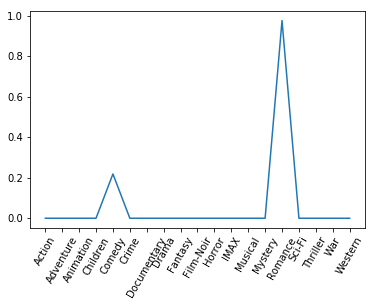

In [18]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_test,y_test)
lasso_coef = lasso.coef_

columns = rating_df_for_one_user.drop(columns=['rating','userId','(no genres listed)','movieId'], axis=1).columns.values
columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns, rotation = 60)
plt.show()